# Overview of usage data for the Math Exam Resources Wiki

<table border="0">
<tr>
<th> Main page: </th> <td> <a href="http://wiki.ubc.ca/Science:Math_Education_Resources"> wiki.ubc.ca/Science:Math_Education_Resources </a> </td>
<td rowspan="4"> <img src="https://raw.github.com/MER-wiki/google-analytics/master/Math_kid.jpg" width=290> </td>
</tr>
<tr>
<th> Contributors portal: </th> <td> <a href="http://wiki.ubc.ca/Science:MER"> wiki.ubc.ca/Science:MER </a>       </td>
</tr>
<tr>
<th> Source of data: </th> <td> google-analytics from CTLT </td>
</tr>    
<th> Contact info: </th> <td> mer-wiki (at) math (dot) ubc (dot) ca </td>
</tr>
</table>

#### Technical background

The python helper function are in their own py file to keep this summary relatively readable.

In [2]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from MERhelpers import *

#Define primary wiki colours
mainColour = '#2F4F4F'; secondColour1 = '#666666'; secondColour2 = '#7491A3';

#XKCD-ify the plots
matplotlib.pyplot.xkcd(scale=0.5, length=100, randomness=5); matplotlib.rcParams['axes.color_cycle'] = [mainColour,secondColour1, secondColour2]; matplotlib.rcParams['font.size'] = 10

Load data set, then do some clean up to reduce down to only valid course names.

In [2]:
dict_all,date_clicks,num_clicks = data_to_dict_clickdates_clickscount('Analytics_all.csv')
clean_dict(dict_all,['MATH100','MATH101','MATH102','MATH103','MATH104','MATH105','MATH110','MATH152', 'MATH200','MATH215','MATH220','MATH221','MATH253','MATH257','MATH307','MATH312','MATH437'])
current_term_dict = dict(dict_all)
clean_dict(current_term_dict,['MATH100'])#,'MATH103','MATH105','MATH110','MATH152','MATH215','MATH220'])

## Total number of clicks

Total time series, with the dates of the exams highlighted.

/home/berny/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


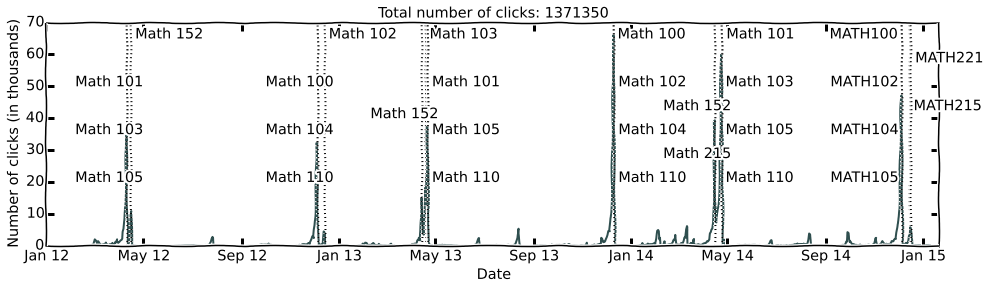

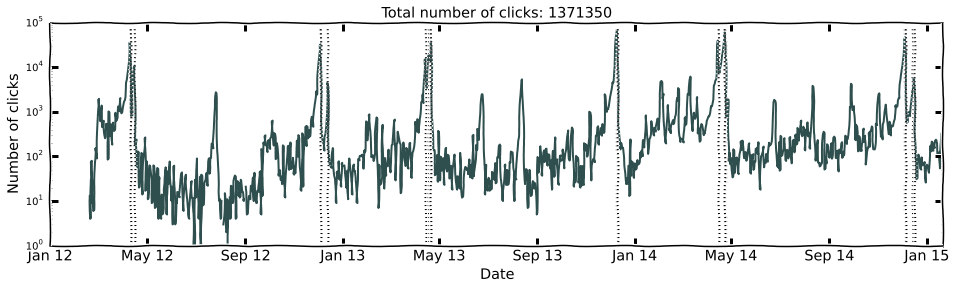

In [3]:
plt.figure(figsize(16,4)); plot_total_clicks_time_series(date_clicks, num_clicks,False,True)
plt.figure(figsize(16,4)); plot_total_clicks_time_series(date_clicks, num_clicks,True,False)

Same data (except summer terms) overlayed for comparison.

In [4]:
Term2_2011 = num_clicks[date_clicks.index('1/1/12'):date_clicks.index('5/1/12')]; Term1_2012 = num_clicks[date_clicks.index('9/1/12'):date_clicks.index('1/1/13')]; Term2_2012 = num_clicks[date_clicks.index('1/1/13'):date_clicks.index('5/1/13')]; Term1_2013 = num_clicks[date_clicks.index('9/1/13'):date_clicks.index('1/1/14')]; Term2_2013 = num_clicks[date_clicks.index('1/1/14'):date_clicks.index('4/30/14')]; Term1_2014 = num_clicks[date_clicks.index('9/1/14'):date_clicks.index('1/1/15')];
Finals_Term2_2011 = num_clicks[date_clicks.index('4/1/12'):date_clicks.index('5/1/12')]; Finals_Term1_2012 = num_clicks[date_clicks.index('12/1/12'):date_clicks.index('1/1/13')]; Finals_Term2_2012 = num_clicks[date_clicks.index('4/1/13'):date_clicks.index('5/1/13')]; Finals_Term1_2013 = num_clicks[date_clicks.index('12/1/13'):date_clicks.index('1/1/14')]; Finals_Term2_2013 = num_clicks[date_clicks.index('4/1/14'):date_clicks.index('4/30/14')]; Finals_Term1_2014 = num_clicks[date_clicks.index('12/1/14'):date_clicks.index('1/1/15')];
Non_Finals_Term2_2011 = sum(Term2_2011)-sum(Finals_Term2_2011); Non_Finals_Term1_2012 = sum(Term1_2012)-sum(Finals_Term1_2012); Non_Finals_Term2_2012 = sum(Term2_2012)-sum(Finals_Term2_2012); Non_Finals_Term1_2013 = sum(Term1_2013)-sum(Finals_Term1_2013); Non_Finals_Term2_2013 = sum(Term2_2013)-sum(Finals_Term2_2013); Non_Finals_Term1_2014 = sum(Term1_2014)-sum(Finals_Term1_2014)

Total number of clicks, during term and finals

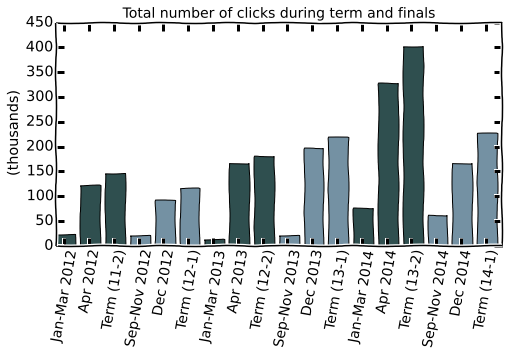

In [5]:
fig = plt.figure(figsize(8,4))
ax = fig.add_subplot(111)
plt.bar(np.arange(18),[Non_Finals_Term2_2011, sum(Finals_Term2_2011),sum(Term2_2011), Non_Finals_Term1_2012, sum(Finals_Term1_2012), sum(Term1_2012), Non_Finals_Term2_2012, sum(Finals_Term2_2012), sum(Term2_2012), Non_Finals_Term1_2013, sum(Finals_Term1_2013), sum(Term1_2013), Non_Finals_Term2_2013, sum(Finals_Term2_2013), sum(Term2_2013), Non_Finals_Term1_2014, sum(Finals_Term1_2014), sum(Term1_2014)], 
        color=[mainColour,mainColour,mainColour,secondColour2,secondColour2,secondColour2])
xTickMarks = ['Jan-Mar 2012','Apr 2012', 'Term (11-2)','Sep-Nov 2012', 'Dec 2012','Term (12-1)','Jan-Mar 2013','Apr 2013','Term (12-2)','Sep-Nov 2013', 'Dec 2013','Term (13-1)','Jan-Mar 2014', 'Apr 2014', 'Term (13-2)', 'Sep-Nov 2014', 'Dec 2014', 'Term (14-1)']
ind = np.arange(18); ax.set_xticks(ind+0.35); xtickNames = ax.set_xticklabels(xTickMarks)
plt.ylabel('(thousands)', size='x-large'); plt.setp(xtickNames, rotation=80, fontsize=14); plt.title('Total number of clicks during term and finals',size=14); plt.gca().set_yticklabels(['0','50','100','150','200','250', '300', '350', '400', '450'],size='x-large')

handles, labels = ax.get_legend_handles_labels(); plt.savefig('total_number_of_clicks_term_finals_bar.png', bbox_inches='tight'); plt.show()

## Where do users spend their time?

### Current Term

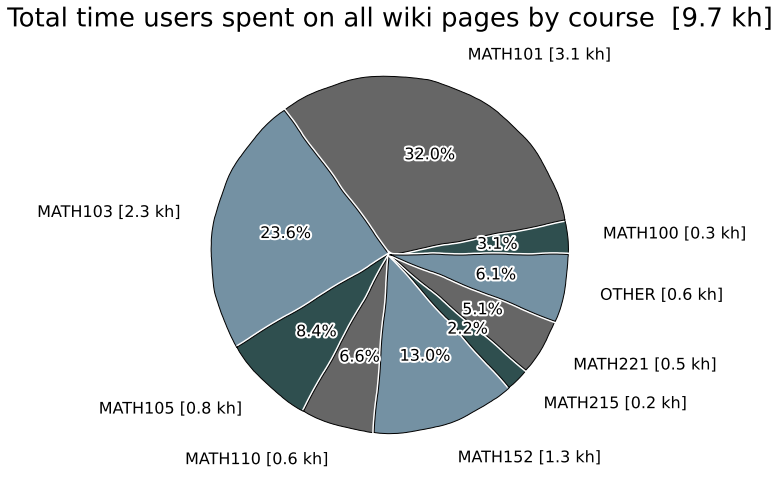

In [19]:
dict_current, date_clicks_current, num_clicks_current = data_to_dict_clickdates_clickscount('Analytics_Winter2015.csv')
clean_dict(dict_current, ['MATH100','MATH101','MATH102','MATH103','MATH104','MATH105','MATH110','MATH152', 'MATH200','MATH215','MATH220','MATH221','MATH253','MATH257','MATH307','MATH312','MATH437'])
matplotlib.rcParams['font.size'] = 16

plt.figure(figsize(8,8))
plot_pie_chart_time_spent_on_course(dict_current,0.02,[mainColour,secondColour1,secondColour2])
plt.savefig('total_time_per_course.png', bbox_inches='tight')  
plt.show()

### Overall

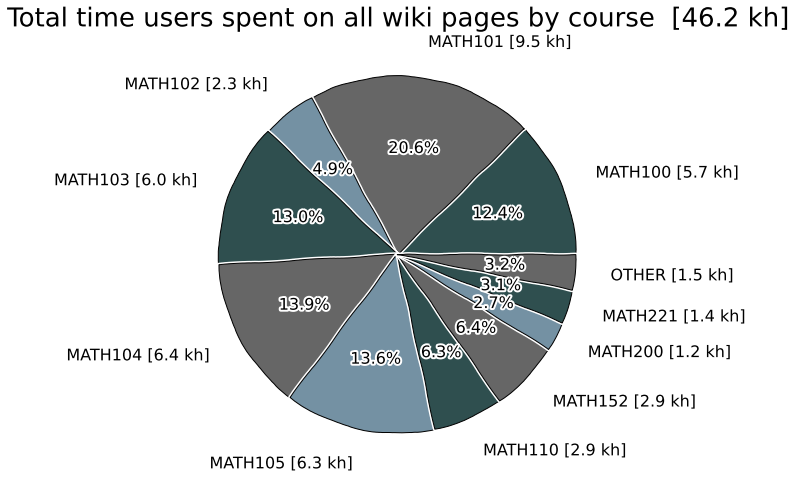

In [7]:
matplotlib.rcParams['font.size'] = 16

plt.figure(figsize(8,8))
plot_pie_chart_time_spent_on_course(dict_all,0.02,[mainColour,secondColour1,secondColour2])
plt.savefig('total_time_per_course.png', bbox_inches='tight')  
plt.show()

### Clicks per exam

How many previous exams do students use to prepare? We would expect the most recent exam to have the most visits. However, some exam were uploaded later.

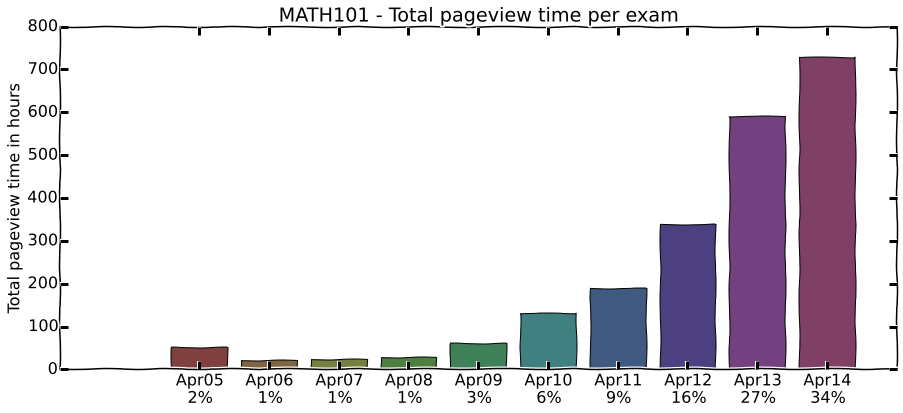

In [12]:
plt.figure(figsize(15,50))
plt.subplots_adjust(hspace=0.6)
for count, course in enumerate(list_courses(dict_current)):
    if not course in ['MATH101']:
        continue
    plt.subplot(3,1,count+1)
    plot_visit_duration_dist(dict_current, course, 'bar')
plt.subplots_adjust(left = 0.125, right= 0.9, bottom = 0.5, top = 0.9, wspace = 0.5, hspace = 0.6)

### Time to solution view

Using analytics provided by the UBC wiki webmasters, MER has information about the difference in time between when students load a page and click to open the question box. A cursory glance suggests two distinct groups of clicks. The first group of clicks occur at times less than 25 secs and the second group appears to have a mode of approximately 2 mins. The data is from the time period from 04/05/2014 (MM/DD/YYYY) to 05/05/2014, encompasssing the April 2014 Exam Period.

In [9]:
del_t = load_delta_t('raw_data/Analytics wiki.ubc.ca Top Events 20140405-20140505.csv'); del_t.extend(load_delta_t('raw_data/Analytics wiki.ubc.ca Top Events 20140405-20140505-2.csv')); del_t.extend(load_delta_t('raw_data/Analytics wiki.ubc.ca Top Events 20140405-20140505-3.csv')); del_t.extend(load_delta_t('raw_data/Analytics wiki.ubc.ca Top Events 20140405-20140505-4.csv')); del_t.extend(load_delta_t('raw_data/Analytics wiki.ubc.ca Top Events 20140405-20140505-5.csv')); del_t = np.asarray(del_t)
print 'Total counted delta_t events:', len(del_t)

Total counted delta_t events: 155647


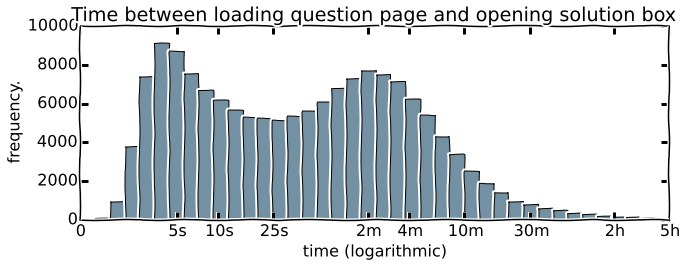

In [10]:
plt.figure(figsize(10,4))
plot_data = del_t[del_t>0]/1000.0 # Three data points are negative, funny. But so few that we don't need to worry about it.
num_bins = 60; plt.hist(np.log10(plot_data), num_bins, facecolor=secondColour2)
plt.xticks(np.log10([1,5,10,25,2*60,4*60,10*60,30*60, 2*60*60, 5*60*60]),['0','5s','10s', '25s', '2m', '4m', '10m', '30m', '2h', '5h']); plt.xlim(0,np.log10([5*60*60]))
plt.title('Time between loading question page and opening solution box'); plt.ylabel('frequency.'); plt.xlabel('time (logarithmic)'); plt.tight_layout(); plt.savefig('2013_Term2_delta_t.png',bbox_inches='tight'); plt.show()

[Correlation analysis of exam score vs. easiness rating](http://nbviewer.ipython.org/github/BernhardKonrad/correlation_analysis/blob/master/MER_correlation_analysis.ipynb)